In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### As we can see a lot of NaN values are present, we should start with cleaning the data,see if we really need the columns

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# lots of null values in unnamed 2,3 and 4
#ie drop three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample()

,v1,v2
2399,ham,Oh... Kay... On sat right?


In [8]:
df.rename(columns={'v1':'classification','v2':'text'},inplace=True)

In [9]:
df.sample()

,classification,text
3724,ham,Nothing spl..wat abt u and whr ru?


In [10]:
#assign value 0 and 1 to spam and ham
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() # convert categorical variables into numerical format

In [11]:
df['classification']=encoder.fit_transform(df['classification'])

In [12]:
df.head()

,classification,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#check missing values
df.isnull().sum()

classification    0
text              0
dtype: int64

In [14]:
#duplicate checking
df.duplicated().sum()

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

## 2.Exploratory Data Analysis(EDA)

understanding data:

In [16]:
#distribution
df['classification'].value_counts()

classification
0    4516
1     653
Name: count, dtype: int64

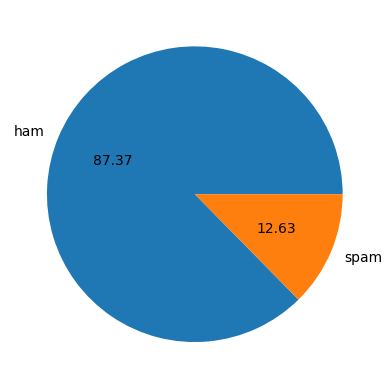

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['classification'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
#we can see that there is 87% ham and 12%spam ie. data is imbalanced

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arshmehar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#count no. of characters,words,sentences

In [22]:
df['num_char']=df['text'].apply(len)

In [23]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,classification,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['classification']==0][['num_char','num_word','num_sent']].describe() # for ham messages

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['classification']==1][['num_char','num_word','num_sent']].describe() #for spam

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
#we can see spam messages are longer

<Axes: xlabel='num_char', ylabel='Count'>

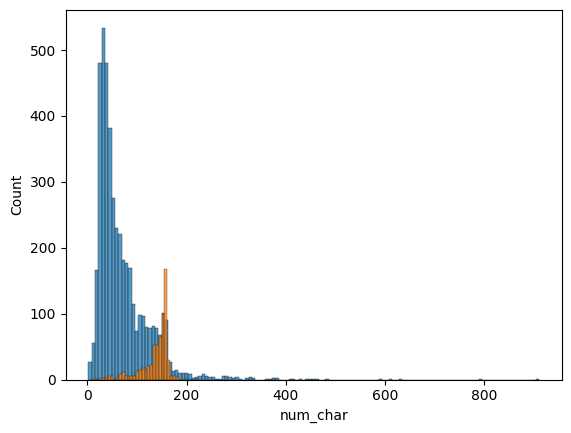

In [30]:
import seaborn as sns
sns.histplot(df[df['classification']==0]['num_char'])
sns.histplot(df[df['classification']==1]['num_char'])

In [31]:
#spam messages have more no. of characters

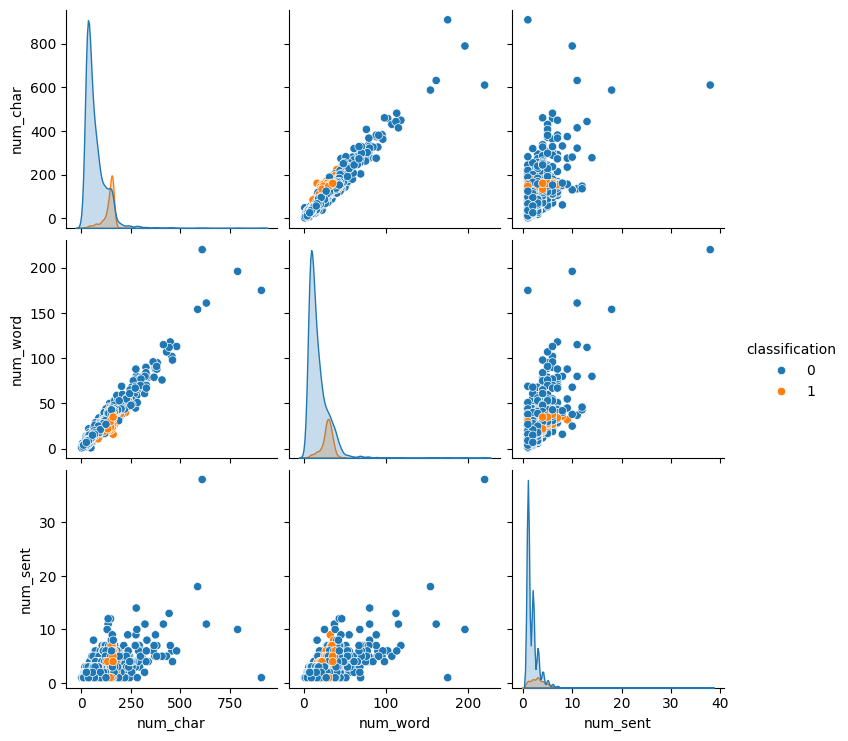

In [32]:
sns.pairplot(df,hue='classification')

In [33]:
#there are outliers in data

In [36]:
my_df = df.select_dtypes(exclude=[object])

<Axes: >

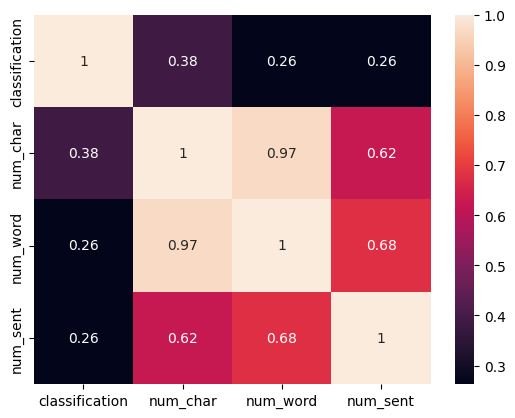

In [37]:
sns.heatmap(my_df.corr(),annot=True)

In [38]:
#num of char has strongest corr with target classification out of the 3 columns

## Data preprocessing

### 1.lower case
        convert data in lowercase
### 2.tokenize
    break down(generally in words)
### 3.remove special char
### 4. remove stop words & punctuation
        stop words:help in sentence formation,but no meaning change(is, of, the)
### 5.stemming
    or limitization : similar words put as one(pin pinned pinning --> pin)

In [44]:
# access stop words:help in sentence formation,but no meaning change(is, of, the)
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
#access punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)#returns list of words
    #to remove special char, ie we only keep alphanumeric char
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y.copy()
    y.clear
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y
    

In [ ]:
transform_text('Hi how are you')